In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [56]:
x_train=np.loadtxt('train_X.csv',delimiter=',')
y_train=np.loadtxt('train_label.csv',delimiter=',')
x_test=np.loadtxt('test_X.csv',delimiter=',')
y_test=np.loadtxt('test_label.csv',delimiter=',')



---



---



---



In [57]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1000, 784)
y_train shape: (1000, 10)
x_test shape: (350, 784)
y_test shape: (350, 10)


In [58]:
#this matrix is (m,n)=>(observation,neurons)
#we need (n,m) so we will do transform
x_train=np.loadtxt('train_X.csv',delimiter=',').T
y_train=np.loadtxt('train_label.csv',delimiter=',').T
x_test=np.loadtxt('test_X.csv',delimiter=',').T
y_test=np.loadtxt('test_label.csv',delimiter=',').T

In [59]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (784, 1000)
y_train shape: (10, 1000)
x_test shape: (784, 350)
y_test shape: (10, 350)


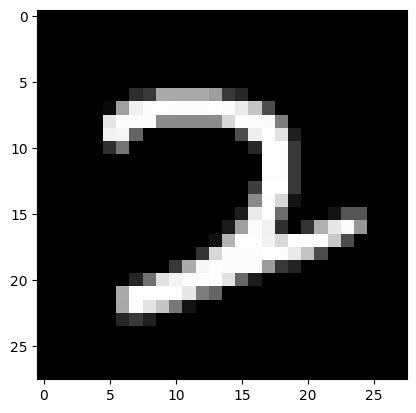

In [60]:
#lets display any image from data
index=random.randint(0,x_train.shape[1])#0 to 1000 as x_train.shape[1]==1000
#imshow is used to display the image
plt.imshow(x_train[:,index].reshape(28,28),cmap='gray')#extract image at index value
plt.show()

In [61]:
#now lets implement model
#lets make activation function for tanh
def tanh(x):
  return np.tanh(x)
def relu(x):
  return np.maximum(x,0)
#for softmax
def softmax(x):
  e_x=np.exp(x-np.max(x))
  return e_x/e_x.sum()

In [62]:
#now derivative
def derivative_tanh(x):
  return (1-np.power(x,2))
def derivative_relu(x):
  return np.array(a>0,dtype=np.float32)

In [63]:
#lets check for relu
a = np.array([[-1, 1, 2], [1, -2, 3]])
np.array(a>0,dtype=np.float32)

array([[0., 1., 1.],
       [1., 0., 1.]], dtype=float32)

In [64]:
#createing function to initialize the parameter
#where we first put random weight-->step1
def initialize_parameters(n_x,n_h,n_y):
  w1=np.random.randn(n_h,n_x)*0.01 #small coefficient to scale down
  b1=np.zeros((n_h,1))

  w2=np.random.randn(n_y,n_h)*0.01 #small coefficient to scale down
  b2=np.zeros((n_y,1))
  #will store all these in parameter  dictionary
  parameters={
      "w1":w1,
      "b1":b1,
      "w2":w2,
      "b2":b2
  }
  return parameters

#input-->hidden(one hidden in this model)-->output

In [65]:
#forward propagation-->step2
def forward_propagation(x, parameters):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }

    return forward_cache

In [66]:
#cost fuction-->step3
def cost_function(a2,y):
  m=y.shape[1]; #second dimention in matrix
  #cost of softmax
  cost=-np.sum(y*np.log(a2))/m
  #cost=-(1/m)*np.sum(np.sum(y*np.log(a2,0),1))-->both are same
  return cost

In [73]:
#back propagation-->step4
def backward_prop(x, y, parameters, forward_cache):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    a1 = forward_cache['a1']
    a2 = forward_cache['a2']

    m = x.shape[1]

    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)

    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    return gradients
#axis=1,column wise sum and keepdims forces to return poper shape

In [68]:
#function for update parameters-->step5
def update_parameters(parameters,gradients,learning_rate):
  w1=parameters['w1']
  w2=parameters['w2']
  b1=parameters['b1']
  b2=parameters['b2']

  dw1=gradients['dw1']
  dw2=gradients['dw2']
  db1=gradients['db1']
  db2=gradients['db2']

  w1=w1-learning_rate*dw1
  w2=w2-learning_rate*dw2
  b1=b1-learning_rate*db1
  b2=b2-learning_rate*db2

  parameters={
      "w1":w1,
      "b1":b1,
      "w2":w2,
      "b2":b2
  }
  return parameters


In [80]:
#model

def model(x,y,n_h,num_iterations,learning_rate):
  n_x=x.shape[0]
  n_y=y.shape[0]
  cost_list=[];
  parameters=initialize_parameters(n_x,n_h,n_y)
  for i in range(num_iterations):
    forward_cache=forward_propagation(x,parameters)
    cost=cost_function(forward_cache['a2'],y)
    gradients=backward_prop(x, y, parameters, forward_cache)
    parameters=update_parameters(parameters,gradients,learning_rate)
    cost_list.append(cost)
    if(i%(num_iterations/10)==0):
      print("cost after",i,"iteration",cost)
  return parameters,cost_list

In [83]:
iterations = 100
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(x_train, y_train, n_h = n_h, learning_rate = learning_rate, num_iterations = iterations)
print(Parameters)

cost after 0 iteration 9.235068039265396
cost after 10 iteration 8.555562350318116
cost after 20 iteration 10.759896377062818
cost after 30 iteration 13.983435737732542
cost after 40 iteration 17.477530880852918
cost after 50 iteration 21.09232082482883
cost after 60 iteration 24.808565896069812
cost after 70 iteration 28.61375294574627
cost after 80 iteration 32.34390089128793
cost after 90 iteration 35.988895428708275
{'w1': array([[-0.00040657, -0.00151157, -0.00242316, ...,  0.00117013,
        -0.01613014,  0.00125581],
       [-0.02646581, -0.01293564,  0.00832099, ...,  0.00837846,
        -0.00310145,  0.00507282],
       [ 0.0007493 , -0.00049154, -0.00480535, ...,  0.00043638,
         0.00384291, -0.00436754],
       ...,
       [-0.00639225,  0.00914173, -0.00758029, ...,  0.01440186,
        -0.0201618 , -0.01482811],
       [ 0.004383  ,  0.00400182, -0.00214686, ...,  0.00475304,
         0.00439172, -0.00368479],
       [ 0.01682145,  0.00287501, -0.00388904, ..., -0.00